# Assignment 2: Milestone I Natural Language Processing
## Task 2&3
#### Student Name: NGOC BAO VY LE
#### Student ID: 3828276

Date: 03/10/2021

Version: 1.0

Environment: Python 3 and Jupyter notebook


## Introduction
In this task, we will generate different types of feature representations for the collection of
job advertisements.<br>
The feature representation that we need to generate includes the following:<br>
Bag-of-words model:<br>
○ Generate the Count and IF-IDF vector representation for each job advertisement description<br>
<br>
Models based on word embeddings:<br>

○ Generate feature representation of job advertisement description based on
the following language models, respectively:<br>
<span>■ FastText language model trained based on the provided job advertisement
descriptions, with a 200 embedding dimension <br>
■ 2 pre-trained language models:  GoogleNews300 with a 300 embedding dimension, Glove with a 200 embedding dimension<br>

For each of the above language models, we will generate the weighted and  IF-IDF document vectors for each job advertisement description.<br>
<br>
There are 2 questions, we try to answer:<br>
>Question 1:Which language model(based on job advertisement descriptions) performs the best with the logistic regression model?<br>
To do so we need to build machine learning models for classifying the category of the job descriptions text using logistic regression model from sklearn. Then comparing the accuracy score<br>
    
    
    
>Question 2: Does more information provide higher accuracy?<br>
to do so we will conduct 3 experiment where we compare the performance of the ML model base on :<br>
    ■ Titles only<br>
    ■ Descriptions only<br>
     ■ Titles + description <br>
 



## Importing libraries 

In [1]:

import re
import gensim.downloader as api
import pandas as pd

from gensim.models.fasttext import FastText
import os
import numpy as np
from itertools import chain

import gensim.models

## Task 2. Generating Feature Representations for Job Advertisement Descriptions

### 2.1 Bag-of-words model

### Generate the Count vector representation for each job advertisement description
get the list of vocab from task 1

In [2]:
# read vocab
with open('vocab.txt', 'r') as f:
    
    # read all words and split them into an array  
    vocab = f.read().splitlines()
    
    # extract the each word in vocal array by subtitute digital characters into the empty string
    vocab = sorted([re.sub(r':\d+$', '', w) for w in vocab])
    
# check vocab size
len(vocab)

40038

### extracting jobAds , webIndexs, jobIds, categories, titles from job_ads.txt

In [3]:
# create jobAds , webIndexs and jobIds array 
jobAds = []
webIndexs = []
jobIds = []
categories = []
titles = []

# read job_ads file and extract descriptions, webIndexs, jobIds
with open('./job_ads.txt', 'r') as f:
    
    # read all job_ads then split them by new line into an array
    lines = f.read().splitlines()
    
    
    # loop through each line
    for line in lines:
        
         # extract line starts with Id
        if len(line) != 0 and line.startswith('ID:'):
            
            # only extract txt after Description:\s+
            iD = re.sub(r'^ID:\s+', '', line)
            
            # add that line in the jobAds
            jobIds.append(int(iD))
            
             #  extract line starts with Category
        if len(line) != 0 and line.startswith('Category'):
            
            # only extract txt after Category:\s+
            category = re.sub(r'^Category:\s+', '', line)
            
            # add that line in the Category
            categories.append(category)
            
         
        #  extract line starts with Webindex
        if len(line) != 0 and line.startswith('Webindex'):
            
            # only extract txt after Webindex:\s+
            webindex = re.sub(r'^Webindex:\s+', '', line)
            
            # add that line in the Webindex
            webIndexs.append(int(webindex))
            
        
           # extract line starts with title
        if len(line) != 0 and line.startswith("Title:"):
            
            # extract the txt after Titles:, and normalize it
            line = re.sub(r'^Title:\s*', '', line).lower()
            # add it to the titles list
            titles.append(line)
            
        
        # extract line starts with Description
        if len(line) != 0 and line.startswith('Description'):
            
            # only extract txt after Description:\s+
            description = re.sub(r'^Description:\s+', '', line)
            
            # add that line in the jobAds . create a jobAds text
            jobAds.append(description)
            

In [4]:
# checking if they all have the same length
print('jobAds: ', len(jobAds))

print('webIndex: ', len(webIndexs))

print('jobIds:', len(jobIds))
    
print('categories:', len(categories))

print('titles:', len(titles))

jobAds:  55449
webIndex:  55449
jobIds: 55449
categories: 55449
titles: 55449


### generate TFIDF vector for each jobAd for later use in task 3

In [5]:
# extract the TfidfVectorizer() to generate TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

 # initialised the TfidfVectorizer using vocab from the job description
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = vocab)

# generate the tfidf vector representation for all articles
tfidf_vector = tVectorizer.fit_transform(jobAds) 

# check the size
tfidf_vector.shape

(55449, 40038)

##### Extracting the weight for words in each job description from tfidf vector
we will create an emty list to store the dictionary of word:weight for each job description

In [6]:
def mapping_words_weights(tfidf_vector, vocab):
    
    tfidf_features = []  # create empty list
    sorted(vocab) # sort vocab
    for i in range(tfidf_vector.shape[0]): # loop through tfidf_vector by index
        jobAd = {} # create an emty dict for each job description
        for word_index in tfidf_vector[i].nonzero()[1]:# extract the index of word that have the weight > 0
            weight = tfidf_vector[i][0, word_index] # extract the weight of word by word index 
            jobAd[vocab[word_index]] = weight #using the word_index to allocate the word in vocab list then assign the word to it's corresponding weight
                                             # and save it in dictionary
        tfidf_features.append(jobAd)  # after finding all the word and it's weight for each job ad, add the dictionary in the tfidf_features list
    return tfidf_features

In [7]:
# mapping words:weights
tfidf_features = mapping_words_weights(tfidf_vector, vocab)

###  generate count vector for each jobAd

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
# initialise the count vectore using vocal set
cVectorizer = CountVectorizer(analyzer = "word",vocabulary = vocab)

# feed the model with string of jobAds text to generate count vector for each job ad
count_features = cVectorizer.fit_transform(jobAds) 

# check the size of count_features. It has the length of number of jobAds and the width of vocab size
print('the dimension of count vector for the all jobAds')
print(count_features.shape)

the dimension of count vector for the all jobAds
(55449, 40038)


### Validation 

Creating a function to cross check if all the words in a particular job description match the count vector by display
the job ad ID, description txt, description tokens and Vector representation

In [9]:
def validator(data_features, vocab, a_ind, article_ids,article_txts,tokenised_articles):
    
    print("jobAd ID:", article_ids[a_ind]) # print out the jobad ID
    print("--------------------------------------------")
    print("description txt:",article_txts[a_ind]) # print out the txt of the job description
    print()
    print("description tokens:",tokenised_articles[a_ind]) # print out the tokens of job description
    print("--------------------------------------------\n")
    print("Vector representation:\n") 
    # printing the vector representation as format 'word:value' 
     # the value is 0 or 1 in for binary vector; an integer for count vector; and a float value for tfidf

    for word, value in zip(vocab, data_features.toarray()[a_ind]): 
        if value > 0:
            print(word+":"+str(value), end =' ')

In [10]:
# check job ad 0 for count vector
validator(count_features, vocab, 0, jobIds,jobAds,[i.split(' ') for i in jobAds])
print()
print('They are matched')

jobAd ID: 14624
--------------------------------------------
description txt: established manufacturer supplier quality water treatment plants ranging basic water softeners reverse osmosis equipment customer complex water treatment solutions meet clients requirements flexibility tailoring product budgets due expansion increased workload seeking recruit planet engineer cover accounts corridor responsibilities include conducting routine sampling analysis water systems interpreting results maintenance installation chemical dosing systems servicing accounts industrial commercial industries complete accordance approved code practice ideal applicant minimum years relevant industry reverse osmosis water softeners water filters uv equipment full driving license return offering competitive package ideal

description tokens: ['established', 'manufacturer', 'supplier', 'quality', 'water', 'treatment', 'plants', 'ranging', 'basic', 'water', 'softeners', 'reverse', 'osmosis', 'equipment', 'customer

In [11]:
# checking jobAd 50 for tfidf_vector
validator(tfidf_vector, vocab, 0, jobIds,jobAds,[i.split(' ') for i in jobAds])
print()
print('They are matched')

jobAd ID: 14624
--------------------------------------------
description txt: established manufacturer supplier quality water treatment plants ranging basic water softeners reverse osmosis equipment customer complex water treatment solutions meet clients requirements flexibility tailoring product budgets due expansion increased workload seeking recruit planet engineer cover accounts corridor responsibilities include conducting routine sampling analysis water systems interpreting results maintenance installation chemical dosing systems servicing accounts industrial commercial industries complete accordance approved code practice ideal applicant minimum years relevant industry reverse osmosis water softeners water filters uv equipment full driving license return offering competitive package ideal

description tokens: ['established', 'manufacturer', 'supplier', 'quality', 'water', 'treatment', 'plants', 'ranging', 'basic', 'water', 'softeners', 'reverse', 'osmosis', 'equipment', 'customer

In [12]:
# Check if we maped the word: weight right for the tfidf_features
print('they are matched')
tfidf_features[0]

they are matched


{'years': 0.041590542795583656,
 'workload': 0.07732175012039134,
 'water': 0.5286729566108767,
 'uv': 0.14982015121823747,
 'treatment': 0.16407476000533092,
 'tailoring': 0.12993687026598563,
 'systems': 0.0874279713366735,
 'supplier': 0.07259254600891585,
 'solutions': 0.046187881358403474,
 'softeners': 0.3220111352242161,
 'servicing': 0.08680694862092261,
 'seeking': 0.050286797021186276,
 'sampling': 0.12071529492890433,
 'routine': 0.0932573883599681,
 'reverse': 0.26741349387597624,
 'return': 0.058710613482731745,
 'results': 0.06350568212526252,
 'responsibilities': 0.044233371866369775,
 'requirements': 0.04039193437758663,
 'relevant': 0.04718681220880245,
 'recruit': 0.05243298838673115,
 'ranging': 0.08653069973907888,
 'quality': 0.0416852305217405,
 'product': 0.051321663794658495,
 'practice': 0.05799010332874837,
 'plants': 0.11640863076245764,
 'planet': 0.13457923751449027,
 'package': 0.048082241161251815,
 'osmosis': 0.3328705376055253,
 'offering': 0.0570487077

Cross-check the output, we can see they are matched . So the mapping_word_weight is working as expected

### Saving count vectors to txt
format: word_integer_index:word_freq 

In [13]:
# this funtion take count vector and a filename to save each count vector of a job ad in the required format

def write_vectorFile(data_features,filename):
    
    # the number of document
    num = data_features.shape[0] 
    
    # creates a txt file and open to save the vector representation
    out_file = open(filename, 'w')
    
     # loop through each article by index
    for a_ind in range(0, num):
        
        # add # before each web index
        out_file.write('#' + str(webIndexs[a_ind]))
        
        # for each word index that has non-zero entry in the data_feature
        for f_ind in data_features[a_ind].nonzero()[1]: 
            
            # retrieve the value of the entry from data_features
            value = data_features[a_ind][0,f_ind] 
            
            # add comma for before each write
            out_file.write(',')
            
            # write the entry to the file in the format of word_index:value
            out_file.write("{}:{}".format(f_ind,value))
            
         # start a new line after each job ad
        out_file.write('\n') 
     # close the file   
    out_file.close() 

In [14]:
# save count_vector
write_vectorFile(count_features, 'count_vectors.txt')

### 2.2 Models based on word embeddings:

##### create an data frame to store all infor of jobAds

In [15]:
# make an empty data frame
df = pd.DataFrame()

# adding information of jobAds into data frame

df["ID"] = jobIds

df['WebIndexs'] = webIndexs

df['Category'] = categories

df['JobAdText'] = jobAds

df['Tokenized_JobAd'] = [i.split(' ') for i in jobAds] # get the tokens for each jobAds

df['Titles'] = titles

df.head(3)

,ID,WebIndexs,Category,JobAdText,Tokenized_JobAd,Titles
0,14624,62119057,Engineering,established manufacturer supplier quality wate...,"[established, manufacturer, supplier, quality,...",plant engineer
1,31567,66314490,Healthcare_Nursing,timeout children homes rapidly expanding foref...,"[timeout, children, homes, rapidly, expanding,...",residential care worker
2,50131,69182387,Hospitality_Catering,french restaurant club gascon michelin establi...,"[french, restaurant, club, gascon, michelin, e...",chef de rang for michelin starred restaurant


#### Generating unweighted document vectors function
The following function takes:<br>

wv, an word:embedding dictionary or KeyedVectors; and<br>
tk_txts, a list of tokenized texts, each of an jobad<br>
as argument, it then does the following to generate the list of embedding vector representations, each for an jobad:<br>

creates an empty list docs_vectors to store the document embeddings of jobads<br>
it loop through every tokenized text:<br>
creates an empty list temp to store all the word embeddings of the jobad<br>
for each word that exists in the word embeddings dictionary/keyedvectors, row bind the word embedding to temp<br>
take the sum of each column to create the document vector, i.e., the embedding of an job ad<br>
append the created document vector to the list of document vectors<br>

In [16]:
def gen_unweighted_docVecs(wv,tk_txts): # generate vector representation for documents
    docs_vectors = []# creating empty final list

    for i in range(0,len(tk_txts)):                
        tokens = tk_txts[i]        
        temp = []  # creating a temporary list(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
   
        for w_ind in range(0, len(tokens)): # looping through each word of a single document and spliting through space
           
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
                temp.append(word_vec) # if word is present then append it to temporary list
            except:
                pass
        doc_vector = sum(temp) # take the sum of each array
        docs_vectors.append(doc_vector) # append each document value to the final list3
                          
    return pd.DataFrame(docs_vectors) # return a dataframe of docs_vectors

#### Generating TF-IDF weighted document vectors function
* the following function takes the word embeddings dictionary, the tokenized text of jobads, and the tfidf weights (list of word:weight dictionaries, one for each job ad) as arguments, and generates the document embeddings:
 1. creates an empty list `docs_vectors` to store the document embeddings of jobads
  2. it loop through every tokenized text:
    - creates an empty list `temp` to store all the word embeddings of the jobads
    - for each word that exists in the word embeddings dictionary/keyedvectors, 
        - if the argument `tfidf` weights are empty `[]`, it sets the weight of the word as 1
        - otherwise, retrieve the weight of the word from the corresponding word:weight dictionary of the job ads from  `tfidf`
    - row bind the weighted word embedding to `temp`
    - takes the sum of each column to create the document vector, i.e., the embedding of an job ad
    - append the created document vector to the list of document vectors

In [17]:

def gen_TFIDF_docVecs(wv,tk_txts,tfidf = []): # generate vector representation for documents
    docs_vectors = [] # creating empty final list

    for i in range(0,len(tk_txts)):
        tokens = list(set(tk_txts[i])) # get the list of distinct words of the document
        

        temp = []  # creating a temporary list(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
        for w_ind in range(0, len(tokens)): # looping through each word of a single document and spliting through space
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in embeddings then proceed
                
                if tfidf != []:
                    word_weight = float(tfidf[i][word])
                else:
                    word_weight = 1
                        
                temp.append(word_vec*word_weight)# if word is present then append it to temporary list
            except:
                pass
        
        doc = sum(temp) # take the sum of array
        docs_vectors.append(doc) # append each document value to the final list
        
    return pd.DataFrame(docs_vectors)

#### Create a function to plot the vectors into 2 dimensions 

The following function `plotTSNE` takes the following arugments:
* labels is the category of each jobAd
* features, a numpy array of document embeddings, each for an jobAd.

and projects the feature/document embedding vectors in a 2 dimension space and plot them out. 
It does the following:
1. get the set of classes, called `categories` (8 categories)
2. sample 15% of the data/document embeddings randomly, and record the indices selected
3. project the selected document embeddings in 2 dimensional space using tSNE, each document embedding now corresponds to a 2 dimensional vector in `projected_features`
4. plot them out as scatter plot and highlight different categories in different color

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
def plotTSNE(labels,features): # features as a numpy array, each element of the array is the document embedding of an article
    categories = sorted(labels.unique())
    # Sampling a subset of our dataset because t-SNE is computationally expensive
    SAMPLE_SIZE = int(features.shape[0] * 0.15)
    np.random.seed(0)
    indices = np.random.choice(range(features.shape[0]), size=SAMPLE_SIZE, replace=False)
    projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
    colors = ['pink', 'green', 'midnightblue', 'orange', 'lightgrey', 'red','lightblue', 'purple' ]
    for i in range(0,len(categories)):
        points = projected_features[(labels[indices] == categories[i])]
        plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=categories[i])
    plt.title("Feature vector for each article, projected on 2 dimensions.",
              fontdict=dict(fontsize=15))
    
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

### 2.2.1 FastText 
<b>train it based on the provided job advertisement descriptions, with a 200 embedding dimension

#### Creating the decriptions txt file 
format: jobAds text in row seperated by line<br>
this file will be use to generate the corpus for JobAds in training Fastext model

In [19]:
# Create a function to save jobAds text in row seperated by line
def create_txt_file(filename, data):
    # creates a txt file named filename, open in write mode
    out_file = open(filename, 'w')
    # loop throught each jobAds text 
    for i in data:  
        # write them by string + new line
        out_file.write(i + '\n')        

In [20]:
filename = './descriptions.txt'
create_txt_file(filename, jobAds)

In [21]:
# 1. Set the corpus file names/path
corpus_file = './descriptions.txt'

# 2. Initialise the Fast Text model by 200 dimensions
descriptions_FastText = FastText(vector_size=200) 

# 3. build the vocabulary 
descriptions_FastText.build_vocab(corpus_file=corpus_file)

# 4. train the model
descriptions_FastText.train(
    corpus_file=corpus_file, epochs=descriptions_FastText.epochs,
    total_examples=descriptions_FastText.corpus_count, total_words=descriptions_FastText.corpus_total_words)

# see the size of descriptions_FastText 
print("descriptions_FastText: ", descriptions_FastText)


# retrieve the KeyedVectors from the model
descriptions_FastText_wv = descriptions_FastText.wv
print("KeyedVectors:", descriptions_FastText_wv)

descriptions_FastText:  FastText(vocab=22816, vector_size=200, alpha=0.025)
KeyedVectors: <gensim.models.fasttext.FastTextKeyedVectors object at 0x00000203212BA100>


### A: generating unweighted feature representation for FastText

In [22]:
# generating document vectors using the build-in function
fastText_unweighted =  gen_unweighted_docVecs(descriptions_FastText_wv,df['Tokenized_JobAd'])
    
# check for null value
fastText_unweighted.isna().any().sum()   


0

In [23]:
print(fastText_unweighted.shape)
fastText_unweighted.head()

(55449, 200)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,56.415966,-15.563130,72.991119,-1.994818,8.648594,4.888956,9.036940,32.347713,20.899065,51.118744,...,36.196194,-38.917290,-22.924555,20.249897,-2.202793,36.413578,-74.658577,-6.784046,5.223900,-2.040998
1,-6.158981,33.268208,13.525619,0.246387,-8.117629,31.740261,29.315483,15.985194,-50.468185,23.048286,...,10.852346,-0.035045,-43.781605,0.679739,-12.297942,6.991672,54.844463,-4.061467,-16.725800,-12.327259
2,10.578618,-21.672979,9.397692,17.338749,-8.093718,11.873767,-10.210352,-2.098832,7.639462,29.961290,...,-18.759836,26.745678,-5.422870,-14.221698,8.278571,1.811818,22.313087,23.253147,-43.234272,17.091288
3,0.234256,-11.457364,-46.375641,-36.572048,3.238706,1.935773,22.452177,8.155232,-64.038376,-19.956148,...,10.764869,-0.562392,-28.195566,-12.909414,-22.108217,-1.949676,33.900612,-24.571571,-35.974564,-6.219907
4,19.574549,-23.054453,2.267670,-20.554098,-18.113405,29.527319,10.111325,13.513924,-6.902722,19.284853,...,-8.202888,-3.439081,-33.132370,-7.298131,10.691627,-10.474490,5.301602,-14.563229,-34.621765,-3.020010


#### projecting unweighted document embeddings in 2 dimensional space

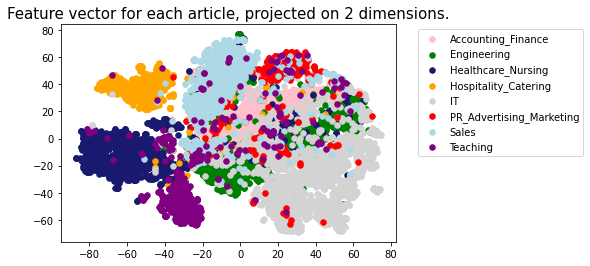

In [24]:
features = fastText_unweighted.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(df['Category'],features)

The plot indicated that there are alot of noise. IT, Engineering are mixed up alot. Overall, all Healthcare, Teaching , hospitality are differentiate quite clearly.

### B: generating weighted feature representation for FastText

In [25]:
# generating TFIDF vectors
fastText_TFIDF= gen_TFIDF_docVecs(descriptions_FastText_wv,df['Tokenized_JobAd'],tfidf_features)

In [26]:
print(fastText_TFIDF.shape)
fastText_TFIDF.head()

(55449, 200)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,3.960719,-0.729138,6.439678,0.018001,1.523043,0.485200,0.541209,1.901031,1.724908,3.124583,...,2.339096,-2.724488,-1.482069,1.330214,0.336754,3.045884,-5.591854,-1.252357,0.432110,0.346664
1,-1.316899,2.889503,1.272620,0.070199,-0.106432,3.996296,2.270644,0.671648,-5.416204,2.120368,...,0.767790,-0.053510,-4.839423,0.005408,-1.147063,0.777301,4.814767,-0.190440,-1.737590,-1.480847
2,0.077326,-2.666538,1.830158,1.758706,-0.558197,1.560611,-0.939958,-1.653396,1.769730,2.597990,...,-2.358290,3.276222,-0.019524,-1.455882,0.803478,0.273044,1.595491,1.851258,-4.169717,1.949986
3,-0.443141,-0.821420,-4.035614,-3.892179,0.812272,0.637966,2.089175,-0.001057,-4.987542,-1.637388,...,0.785297,-0.286910,-2.122375,-1.428195,-1.858430,0.666562,2.640474,-2.732119,-2.667441,0.077221
4,2.157657,-3.018251,0.230134,-2.621132,-2.165273,3.528837,1.449230,0.901737,-1.269122,1.749605,...,-1.003176,-0.794518,-2.996090,-1.118045,1.076276,-1.027706,0.577863,-2.195701,-3.411097,-0.990356


#### projecting unweighted document embeddings in 2 dimensional space

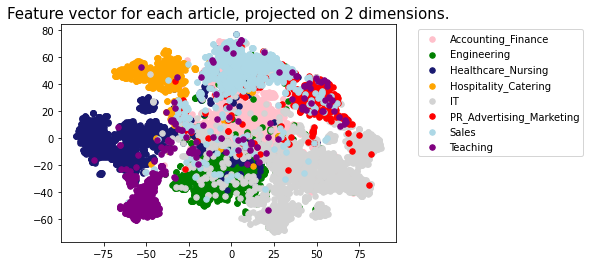

In [27]:
features = fastText_TFIDF.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(df['Category'],features)

this plot is very similar with the previous one

### 2.2.2 pre_trained GloVe



In [28]:

# specified the path to the embedding file
path_to_glove_file = os.path.join("glove.6B/glove.6B.300d.txt")

# create an emty dict
glove_wv = {} 

# open the glove.6B.300d txt file and encode it 
with open(path_to_glove_file, encoding="utf-8") as f:
    
    for line in f:
        
        # max number of splits is 1
        word, coefs = line.split(maxsplit=1) 
                                             
         # construct an numpy array from the string 'coefs',                                     
        coefs = np.fromstring(coefs, "f", sep=" ") 
         
            # create the word and embedding vector mapping . Add it in glove_wv dict
        glove_wv[word] = coefs 

print("Found %s word vectors." % len(glove_wv))

Found 400000 word vectors.


### A:  generating unweighted feature representation for Glove

In [29]:
# generate document embeddings
glove_unweighted = gen_unweighted_docVecs(glove_wv,df['Tokenized_JobAd'])

# check whether there is any null values in the document vectors.
glove_unweighted.isna().any().sum()

0

In [30]:
print(glove_unweighted.shape)
glove_unweighted.head()

(55449, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-2.197354,1.159163,1.236320,-15.670534,-3.212329,3.253896,12.625774,7.933493,-0.488338,-110.931480,...,-10.260087,-4.458088,-3.170978,-4.364176,14.537739,13.845961,-3.752656,-17.961893,1.204020,-1.947374
1,-11.338754,3.071290,2.499938,-0.238676,1.322273,2.749740,-0.312054,-1.606071,-1.928115,-62.453117,...,-5.995009,-14.628064,-2.519705,-8.622393,3.736048,1.116887,-3.072000,-3.590593,0.094523,-8.809059
2,-1.283338,3.844718,4.585536,-1.154910,-3.496203,0.854106,-1.128256,0.080987,-0.285871,-64.099998,...,2.419956,-7.245219,-12.636186,-0.450910,6.754822,10.026826,-1.600276,-9.540119,-7.069987,-4.622457
3,-15.673364,2.360960,2.890041,0.787373,1.128022,-5.840070,3.639604,-2.180736,-2.237748,-74.391487,...,-6.951455,-11.472593,-6.857063,-15.906814,2.191053,15.034398,-2.184544,-7.013738,-8.054841,2.145760
4,-8.312830,-1.811682,2.042164,-1.695956,-1.078097,-3.168170,0.111690,-0.625563,0.489268,-52.720989,...,0.513880,-3.609222,-4.955360,-5.315103,2.652804,12.972917,-5.114026,-8.078370,-5.827615,2.516729


#### projecting unweighted document embeddings in 2 dimensional space

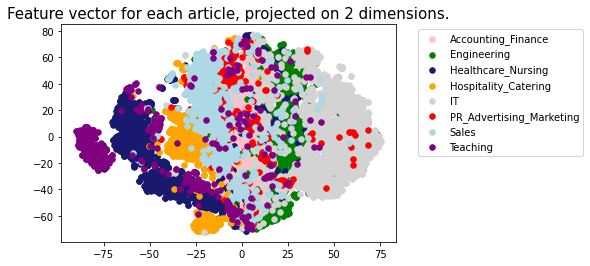

In [31]:
features = glove_unweighted.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(df['Category'],features)

This plot indicate there are a bit of noise. IT, Engineering, PR_advertising_marketing , accounting_finance are mixed up really bad. Teaching and healthcare, hospitality are similar as well

### B: generating TF-ITF feature representation for Glove

In [32]:
# generate TFIDF feature representation
glove_TFIDF= gen_TFIDF_docVecs(glove_wv, df['Tokenized_JobAd'].tolist(), tfidf_features)

# check whether there is any null values in the document vectors.
glove_TFIDF.isna().any().sum()

0

In [33]:
print(glove_TFIDF.shape)
glove_TFIDF.head()

(55449, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.259038,-0.033904,0.179894,-1.196101,-0.335054,0.424413,1.035320,0.227777,0.323257,-7.367743,...,-0.854609,-0.304826,0.077701,-0.083413,1.105825,0.381341,0.035844,-1.186972,0.121379,0.047247
1,-0.949746,0.395570,0.138492,0.195433,0.164003,0.023010,-0.158433,-0.555738,-0.002750,-5.137845,...,-0.919012,-1.415497,-0.185119,-0.646558,0.340058,-0.393193,-0.334723,-0.145399,0.326254,-1.114990
2,0.082155,0.339624,0.650861,-0.244792,-0.487925,0.063836,-0.320629,0.033452,-0.026101,-6.400834,...,0.423880,-0.520422,-1.299017,-0.001082,0.861292,0.755201,-0.296938,-1.110445,-0.668819,-0.310317
3,-1.364799,0.014087,0.316239,0.137838,0.327055,-0.537682,0.475894,-0.441521,-0.175309,-5.685863,...,-0.698657,-0.890249,-0.486084,-1.496458,0.211909,1.095390,0.068446,-0.494581,-0.426211,0.243904
4,-1.010423,-0.084538,0.336777,-0.015950,-0.370593,-0.544032,-0.013105,0.000287,0.096804,-5.733480,...,0.180122,-0.475435,-0.806764,-0.854448,0.226037,1.387242,-0.516084,-1.034340,-0.582259,0.406772


#### projecting unweighted document embeddings in 2 dimensional space

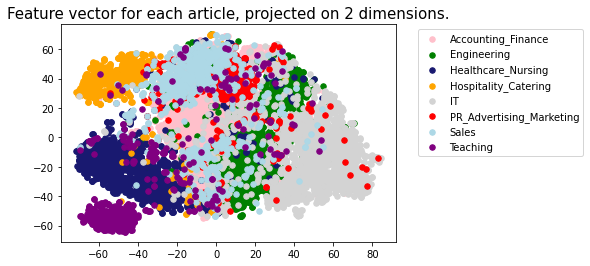

In [34]:
features = glove_TFIDF.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(df['Category'],features)

This plot is not much different to the plot generated by the glove_unweighted

### 2.2.3 GoogleNews300
pre_trained

In [35]:
# load the model
GoogleNews300 = api.load('word2vec-google-news-300')

### A : generate unweighted feature representation for GoogleNews300

In [36]:
#  generate document embeddings
GoogleNews300_unweighted= gen_unweighted_docVecs(GoogleNews300, df['Tokenized_JobAd'].tolist() )

# check whether there is any null values in the document vectors dataframe.
GoogleNews300_unweighted.isna().any().sum()

0

In [38]:
# check the shape
print(GoogleNews300_unweighted.shape)
GoogleNews300_unweighted.head()

(55449, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-4.546768,5.067924,2.481800,2.889145,-5.867694,1.922361,1.819260,-5.643738,3.034363,2.692574,...,-6.215942,2.623596,-4.843262,4.526443,0.330536,0.752022,-0.174652,-0.364319,4.098686,-3.404217
1,-0.872101,0.557505,-0.474548,4.512268,-2.706406,-0.602787,3.192154,-3.002121,4.646362,-4.292419,...,-3.955048,1.782196,-7.212727,-0.014885,-0.591583,1.429382,0.405249,-1.993744,1.269203,-0.962341
2,-3.478378,1.442741,-1.097778,4.933929,-1.868793,1.896019,-0.223526,-5.567322,3.622606,2.308132,...,-2.116924,2.591629,-3.594101,2.625061,0.972580,-1.445465,0.002319,-1.612640,0.562153,-2.285095
3,-3.872299,2.042828,0.468018,0.002045,-2.529800,0.126999,1.607147,-4.834270,5.598373,-3.731567,...,-3.095764,1.786911,-3.837097,3.178623,-1.668671,1.535706,-0.629822,-0.707443,3.304611,1.170349
4,-2.315674,0.330042,0.247406,1.883667,-1.592896,-1.544556,2.662231,-4.661743,3.335389,-0.686310,...,-3.004673,2.648071,-3.676279,0.199734,2.657959,-0.829605,1.010836,-3.689674,-0.146606,-1.210449


#### projecting unweighted document embeddings in 2 dimensional space

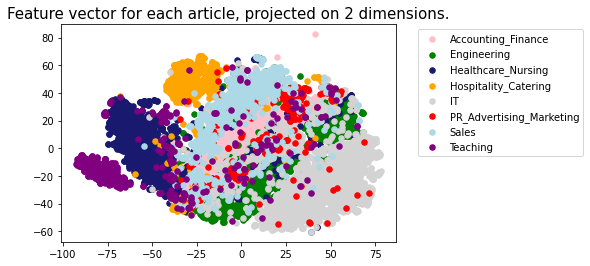

In [39]:
features = GoogleNews300_unweighted.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(df['Category'],features)

This plot has the similar pattern as the previous ones

###  B:  generating TF-ITF feature representation GoogleNews300

In [40]:
# generate TFITF feature representation
GoogleNews300_TFITF= gen_TFIDF_docVecs(GoogleNews300, df['Tokenized_JobAd'].tolist(), tfidf_features)
# check if there is any nan
GoogleNews300_TFITF.isna().any().sum()

0

In [41]:
print(GoogleNews300_TFITF.shape)
GoogleNews300_TFITF.sample(3)

(55449, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
50339,-0.128106,0.103679,-0.001439,0.127171,-0.127037,0.186608,0.169526,-0.303171,0.213163,-0.081685,...,0.067264,0.108538,-0.098075,0.135758,0.047593,-0.205307,-0.088156,-0.010467,0.120052,-0.199562
7258,-0.200944,0.108174,0.023391,0.500461,-0.135843,0.021143,0.445464,-0.609352,0.437278,0.046849,...,-1.024685,0.298647,-0.556775,-0.071015,-0.166405,-0.082672,0.115557,-0.302801,0.432812,-0.216141
37210,-0.554244,0.154245,-0.002143,0.109943,-0.586356,-0.141500,0.289612,-0.325904,0.464128,0.092152,...,-0.508193,0.320643,-0.314744,0.053858,-0.037591,-0.206480,0.251752,-0.122299,0.173237,-0.233983


#### projecting unweighted document embeddings in 2 dimensional space

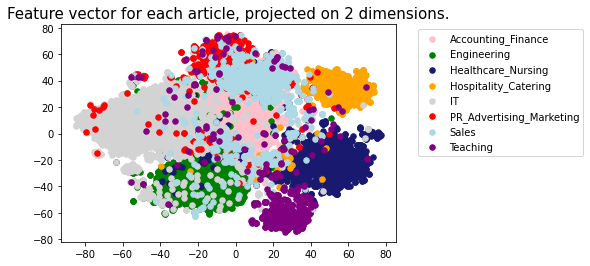

In [42]:
features = GoogleNews300_TFITF.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(df['Category'],features)

Again, Enginerring, sales, IT are mixed up. Teaching and PR_advertising_marketing are also mixed up

### 2.2.3 bag of words model ifidf
as we have generated ifidf vector for descriptions earlier,here we just plot it into 2 dimensions 

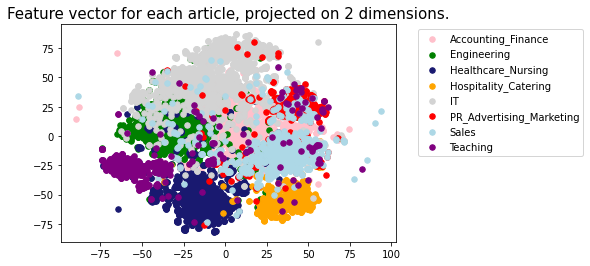

In [43]:
features = tfidf_vector
plotTSNE(df['Category'],features)

### Conclusion task 2: 
*Bag-of-words model:<br>
We generated count_vector/ifidf  vector representation for each job advertisement description, and save count_vector in a text file<br>
<br>
*Models based on word embeddings:<br>
We generated TF-IDF document vectors and unweighted document vectors of job description for FastText, Word2Vec(GoogleNews300) and Glove
<br>
* Ploting vector representations in 2 dimensional space<br>
we have plotted all vectors but count_Vector in 2 dimensions
From the plots, we can see that there are alot of noises. The different categories are not quite seperated clearly. <br>
In general,TF-IDF document vector and  bag of word TF-IDF vector did a better job in differentiate the categories.<br>


## Task 3. Job Advertisement Classification
## Question1: Language model comparisons

we will build machine learning models for classifying the category of a job
description text using the logistic regression model from sklearn.<br> 
Then check which the language models we built previously (based on job advertisement descriptions) performs the best with the logistic regression model to answer Q1<br>

##  Classification bases on Job Description
We will use the above document vectors from 3 language models and 1 from bag of words for classification

In [44]:
# downloading train_test_split and LogisticRegression  from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold


In [45]:
# create a method to train data and return the accuracy score
def build_regression_model(vector_feature, labels):
    
    X_train, X_test, y_train, y_test = train_test_split(vector_feature, labels, test_size=0.33, random_state=0)
    model = LogisticRegression(max_iter=1000, random_state=0)
    model.fit(X_train, y_train)
    score =model.score(X_test, y_test)
    return score
    

set up a kfold cross validation

In [46]:
num_folds = 5
# initialise a 5 fold validation
kf = KFold(n_splits= num_folds, random_state=0, shuffle = True) # initialise a 5 fold validation
print(kf)

KFold(n_splits=5, random_state=0, shuffle=True)


In [47]:
# create a function to train model 5 times using kfold crossvalidation

def evaluate(X_train,X_test,y_train, y_test):
    
    '''
    this method take X_train,X_test,y_train, y_test and using the train part to train the model
    then get the accuracy scoce when comparing the labels between train and test part
    '''
    model = LogisticRegression(max_iter = 1000,random_state=0)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [48]:
# create an dataframe to save the accuracy score for each vector feature of each language model.
# Each each vector features of each language model will be train 5 times
# therefore datafram will has 5 rows and 7 columns

features_df = pd.DataFrame(columns = ['Fastext_unweight','Fastext_tfidf',
                                      'Google300_unweight', 'Google300_tfidf',
                                      'Glove_unweight', 'Glove_tfidf', 'bag_of_words_tfidf'],index=range(5))

#### We using 5-fold cross validation to evaluating the performance of the models


In [49]:
# intialize the index of dataframe by each fold
fold = 0

# capture the train_index, test_index for each time data got split 
for train_index, test_index in kf.split(list(range(len(df)))):

    # capture the labels for train and test data
    
    y_train = [categories[i] for i in train_index]
    y_test = [categories[i] for i in test_index]
    
    
    # each language model, we train by unweighted and weighted vector features
    
    #Fast text
        
    features_df.loc[fold,'Fastext_unweight'] = evaluate(fastText_unweighted.loc[train_index,],
                                                        fastText_unweighted.loc[test_index,],
                                                        y_train,y_test)

    
    features_df.loc[fold,'Fastext_tfidf'] = evaluate(fastText_TFIDF.loc[train_index,], 
                                                     fastText_TFIDF.loc[test_index,],
                                                     y_train,y_test)
    
    
    # Google 300
    features_df.loc[fold,'Google300_unweight'] = evaluate( GoogleNews300_unweighted.loc[train_index,],
                                                          GoogleNews300_unweighted.loc[test_index],
                                                          y_train,y_test)

    features_df.loc[fold,'Google300_tfidf'] = evaluate(GoogleNews300_TFITF.loc[train_index,],
                                                       GoogleNews300_TFITF.loc[test_index,],
                                                       y_train,y_test)
    
    # Glove
   
    features_df.loc[fold,'Glove_unweight'] = evaluate(glove_unweighted.loc[train_index,],
                                                      glove_unweighted.loc[test_index,],
                                                      y_train,y_test)

   
    features_df.loc[fold,'Glove_tfidf'] = evaluate(glove_TFIDF.loc[train_index,],
                                                   glove_TFIDF.loc[test_index,],
                                                   y_train,y_test)
    
    # bag of words
    features_df.loc[fold,'bag_of_words_tfidf'] = evaluate(tfidf_vector[train_index,],
                                                   tfidf_vector[test_index,],
                                                   y_train,y_test)
    # move to the next row in the data frame
    fold +=1

C:\Users\ngbao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ngbao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\ngbao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ngbao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [50]:
print( 'this is all the accuracy scores for feacture vectors from the language models')
features_df

this is all the accuracy scores for feacture vectors from the language models


,Fastext_unweight,Fastext_tfidf,Google300_unweight,Google300_tfidf,Glove_unweight,Glove_tfidf,bag_of_words_tfidf
0,0.865374,0.870965,0.859423,0.866637,0.854373,0.858972,0.88945
1,0.870514,0.872588,0.859784,0.86312,0.8578,0.860415,0.896934
2,0.866276,0.87376,0.859964,0.865014,0.851939,0.856267,0.89477
3,0.864292,0.869883,0.855365,0.859152,0.858521,0.854373,0.891073
4,0.872396,0.878709,0.864009,0.870322,0.858959,0.861394,0.895211


In [51]:
# get the average sore of 5 times that the each vector got trained
descriptions_result = features_df.mean()
descriptions_result

Fastext_unweight      0.867770
Fastext_tfidf         0.873181
Google300_unweight    0.859709
Google300_tfidf       0.864849
Glove_unweight        0.856318
Glove_tfidf           0.858284
bag_of_words_tfidf    0.893488
dtype: float64

we can see that the tfidf feature from the bag of word got the most accuracy score.<br> 
Because it is not recommended by many data experts when doing classification.<br>
We won't use the result from bag_of_words_tfidf to answer Q1 

In [52]:
# extract the max value
descriptions_result[descriptions_result == descriptions_result.max()]

bag_of_words_tfidf    0.893488
dtype: float64

In [53]:
# result for Fastext_tfidf
descriptions_result['Fastext_tfidf']

0.8731808603900844

the unweight vector feature from Glove got the worst accuary score

In [54]:
# extract the min value
descriptions_result[descriptions_result == descriptions_result.min()]

Glove_unweight    0.856318
dtype: float64

### Conclusion for Classification bases on Job Description and answer Q1

Base on the above result  we conclude that , Fast text model performs the best with
the LogisticRegression as it got the highest performance score using job advertisement descriptions.


## Question 2:  Does more information provide higher accuracy?

we have built a number of feature representations of documents based on job descriptions.<br>
However, we have not explored other features of a job advertisement, e.g., the title of the job position.<br> 
Will adding extra information help to boost up the accuracy of the model? To answer this question<br>
<br>
we will conduct experiments to build and compare the performance of classification models that considering:<br>
● only titles of the job advertisement<br>
● only description of the job advertisement (which we already done above)<br>
● both title and description of the job advertisement. For this, we will simply
concatenate title and description of a job advertisement when generating document feature
representation and use it in the classification models<br>
<br>
In this task, we generate Fastext(unweighted/if-idf document vectors) and bag of words(if-idf vectors) based on titles and (titles+descriptions). Then use them for classification and compare the results



## 1. Titles Experiment
in this task, we will:<br> 
-tokenize Title <br>
-generate unweighted/tfidf document vector for Title using fasttext model <br>
-Then use this document vector for classification(kfold=5)

### 1.1 Tokenize and process titles
Frist, we need to process titles<br>
We will tokenize titles by word<br> 
Then removing word with 1 character

In [55]:
from gensim.utils import tokenize

# tokenixe each title
tk_titles = [list(tokenize(i)) for i in titles] #(tokenize(i) return object, so we need to type cast it to list

In [56]:
# it takes a tokenize jobAds list and display the number of vocab, words, Lexical diversity, max/min/average review length

def stats_print(tk_jobAds):
    
    # we put all the tokens in the corpus in a single list
    words = list(chain.from_iterable(tk_jobAds)) 
    
    # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words
    vocab = set(words) 
    
    lexical_diversity = len(vocab)/len(words)
    
    print("Vocabulary size: ",len(vocab))
    print("Total number of tokens: ", len(words))
    print("Lexical diversity: ", lexical_diversity)
    print("Total number of reviews:", len(tk_jobAds))
    
    # compute the number of tokens of each job Ad 
    lens = [len(j) for j in tk_jobAds]
    
    print("Average review length:", np.mean(lens))
    print("Maximun review length:", np.max(lens))
    print("Minimun review length:", np.min(lens))
    print("Standard deviation of review length:", np.std(lens))

In [57]:
# check stats
stats_print(tk_titles)

Vocabulary size:  10801
Total number of tokens:  277135
Lexical diversity:  0.038973785339275084
Total number of reviews: 55449
Average review length: 4.998016195062129
Maximun review length: 22
Minimun review length: 0
Standard deviation of review length: 2.0443326445861993


#### Remove word with 1 character

In [58]:
# remove words with 1 character
tk_titles = [[ word for word in t if len(word) >1] for t in tk_titles]
# Check stat
stats_print(tk_titles)

Vocabulary size:  10774
Total number of tokens:  267199
Lexical diversity:  0.04032200719314069
Total number of reviews: 55449
Average review length: 4.81882450540136
Maximun review length: 22
Minimun review length: 0
Standard deviation of review length: 1.918152055777001


#### Check for rows that are empty in the titles column after processing
We have 1 rows with empty token

In [59]:
# loop through tk_title by index, find where tokenized title is an emty list
[i for i in range(len(tk_titles)) if len(tk_titles[i]) == 0]


[10567]

In [60]:
print('These rows have words are in the stopword and ***')
df.loc[10567]

These rows have words are in the stopword and ***


ID                                                             14392
WebIndexs                                                   50870368
Category                                                 Engineering
JobAdText          large manufacturing facility wolverhampton nuc...
Tokenized_JobAd    [large, manufacturing, facility, wolverhampton...
Titles                                                          ****
Name: 10567, dtype: object

Append the new column for tokenized titles and processed titles txt in to the main dataframe then drop row 10567

In [61]:
# add  Tk_titles column to data frame
df['Tk_titles'] = tk_titles

# drop the row 10567
df.drop(10567, inplace=True)

# reset the df index
df.reset_index(drop=True, inplace=True)

# add processed Titles_txt to dataframe by joining all tokens from each title
df['processedTitles'] = df['Tk_titles'].apply(lambda x: ' '.join(x))

# drop the unprocessed titles column
df.drop('Titles', axis =1, inplace=True)

In [62]:
# row 10567 have been reset
df.loc[10567]

ID                                                             47248
WebIndexs                                                   71797793
Category                                                    Teaching
JobAdText          cover supervisors contracts suit requirements ...
Tokenized_JobAd    [cover, supervisors, contracts, suit, requirem...
Tk_titles                 [cover, supervisor, havering, asap, start]
processedTitles                 cover supervisor havering asap start
Name: 10567, dtype: object

### 1.2 Train Fasttext base on titles

###  Fasttext for titles
in this task, we use the titles to train Fastext then generate unweighted document vector<br>

In [63]:
# get the list of words of titles
titles_words =  list(chain.from_iterable(df.Tk_titles.tolist())) 

# get the vovab of titles
titles_vocab = sorted(list(set(titles_words)))

In [64]:
# create a txt file for titles txt by call the create_txt_file function for task 2
# save each title txt in a line
filename = './titles.txt'
create_txt_file(filename, df['processedTitles'].tolist())


In [65]:
# 1. Set the corpus file names/path
corpus_file = './titles.txt'

# 2. Initialise the Fast Text model by 200 dimensions
titles_FastText = FastText(vector_size=200) 

# 3. build the vocabulary 
titles_FastText.build_vocab(corpus_file=corpus_file)

# 4. train the model
titles_FastText.train(
    corpus_file=corpus_file, epochs=titles_FastText.epochs,
    total_examples=titles_FastText.corpus_count, total_words=titles_FastText.corpus_total_words)

print(titles_FastText)

# get the keyvectors
titles_FastText_wv = titles_FastText.wv

FastText(vocab=3271, vector_size=200, alpha=0.025)


### 1.3 Generate document vectors

### a. Fastext unweighted document vectors for Titles

In [66]:
# generate document embeddings
titles_FastText_unweighted = gen_unweighted_docVecs(titles_FastText_wv,df['Tk_titles'])
# check whether there is any null values in the document vectors dataframe.
titles_FastText_unweighted.isna().any().sum()

0

In [67]:
print(titles_FastText_unweighted.shape)
print('data frame has %d, cuz we deleted a row with empty token for title' %titles_FastText_unweighted.shape[0])
titles_FastText_unweighted.head()

(55448, 200)
data frame has 55448, cuz we deleted a row with empty token for title


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.034829,-0.430142,-0.374348,-0.485626,-0.156978,-0.809254,-0.140836,-0.128499,0.808171,0.713966,...,1.249890,-0.885579,1.141489,0.362091,0.370041,0.154341,-1.071318,0.389886,-0.104173,-0.675370
1,-3.401646,1.402843,-0.314389,-0.791863,2.384946,-0.945893,0.207939,1.989235,0.053702,-1.026698,...,-0.286879,2.412589,-0.413398,-0.353184,-1.765864,1.608415,0.476286,1.252829,-1.020595,0.360443
2,-4.985839,-3.603846,4.736940,3.328376,1.675560,1.459004,-1.789380,-6.106898,4.072722,3.523187,...,5.869315,1.592236,7.577805,-2.283377,2.306228,-4.329136,-3.971991,5.551942,2.933242,5.944510
3,-2.759682,1.673001,-0.428372,-1.718348,0.996405,-1.543404,-0.147851,0.457135,1.049329,-1.604203,...,0.758887,-0.104186,-0.617635,0.944862,-0.944423,-0.188101,1.773280,0.651139,0.361003,-0.222517
4,-0.202274,0.622371,-0.834862,-2.228214,0.866495,-1.932024,1.533168,-1.536967,4.269026,-0.318773,...,1.466970,-1.397052,1.858495,-2.203090,-1.854563,1.804057,-0.426474,0.790520,-0.632303,0.544373


#### projecting unweighted document embeddings in 2 dimensional space

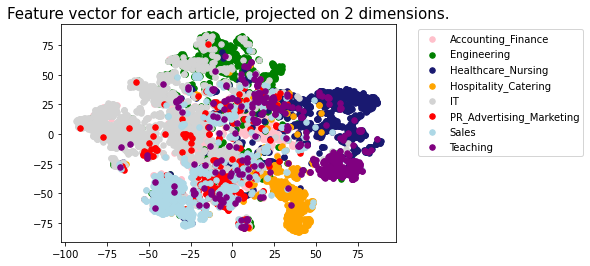

In [68]:
features = titles_FastText_unweighted.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(df['Category'],features)

From the plot, we can see that there are a lot of noises. In overall, the different categories are not seperated clearly, all categories were mixed up. Therefore, we are expecting a slow performance when we train the logistic regression later.

### b. Generate bag of words tfidf_vector for titles 

In [69]:
# initialised the TfidfVectorizer using vocab from the job titles
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = titles_vocab)

# generate the tfidf vector representation for all titles
tfidf_vector = tVectorizer.fit_transform(df['processedTitles'].tolist()) 

# check the size
tfidf_vector.shape

(55448, 10774)

we have bag of word model tfidf_vector for titles, let plot it 

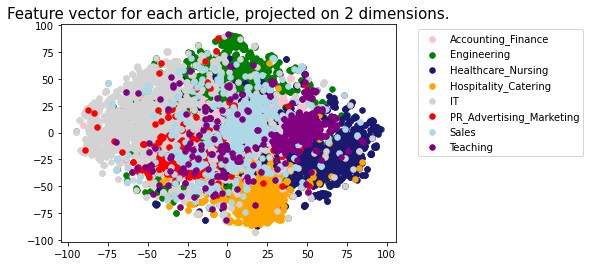

In [70]:
features = tfidf_vector 
plotTSNE(df['Category'],features)

This plot indicated, there are alot of noise

In [71]:
# train logictics model by tfidf_vector (bag of words)
build_regression_model(tfidf_vector, df['Category'].tolist())

0.8428790031697453

### c. Fasttext Tfidf document vector for titles

Mapping the tfidf_vector with words by using funtion mapping_words_weights built in task 2

In [72]:
# mapping words:weights
tfidf_features = mapping_words_weights(tfidf_vector, titles_vocab)

In [73]:
# generating TFIDF vectors
titles_FastText_TFIDF= gen_TFIDF_docVecs(titles_FastText_wv,df['Tk_titles'],tfidf_features)
# check whether there is any null values in the document vectors dataframe.
titles_FastText_TFIDF.isna().any().sum()

0

In [74]:
print(titles_FastText_TFIDF.shape)

titles_FastText_TFIDF.sample(3)

(55448, 200)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
50338,-0.393134,-0.158202,0.178973,-0.638832,-0.185086,-0.194703,-0.039723,-0.825315,0.855454,-0.076732,...,0.496975,-0.055627,1.059266,-0.525077,0.098244,-0.365277,-0.210618,0.160354,0.394147,0.067769
7258,-0.941330,-0.164708,0.419201,0.265123,0.301567,0.403153,0.205428,-0.025843,0.616330,0.260151,...,0.130886,0.209905,0.586718,-0.428697,-0.181613,0.350707,-0.128631,0.766652,-0.532946,0.728135
37210,-0.679439,-1.011130,0.057399,-0.930978,-0.031047,-0.829655,-0.290101,-0.773901,1.289253,-1.265568,...,0.470949,-1.100683,2.038829,-0.299759,-0.473390,-0.164504,0.008013,0.005993,0.290970,0.625575


#### projecting unweighted document embeddings in 2 dimensional space

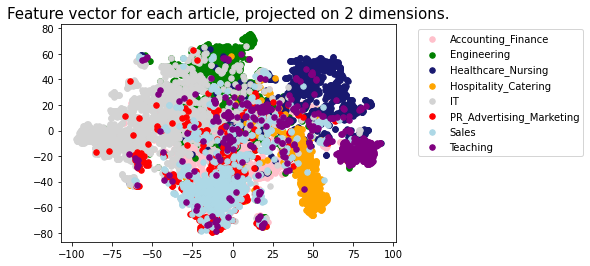

In [75]:
features = titles_FastText_TFIDF.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(df['Category'],features)

### 1.3 Classification for titles

In [76]:
# create an dataframe to save the accuracy score for each time the model gets trained.
# the vector features  will be train 5 times
# therefore datafram will has 5 rows and  3 columns

titles_df1 = pd.DataFrame(columns = ['FastText_unweight', 'FastText_tfidf', 'bag_of_words_tfidf'], index=range(5))

# intialize the index of dataframe by each fold
fold = 0

# capture the train_index, test_index for each time data got split 
for train_index, test_index in kf.split(list(range(len(df)))):

    # capture the labels for train and test data
    
    y_train = df.loc[train_index, 'Category'].tolist()
    y_test = df.loc[test_index, 'Category'].tolist()
      
    titles_df1.loc[fold,'FastText_unweight'] = evaluate(titles_FastText_unweighted.loc[train_index,],
                                                        titles_FastText_unweighted.loc[test_index,],
                                                        y_train,y_test)
    
    titles_df1.loc[fold,'FastText_tfidf'] = evaluate(titles_FastText_TFIDF.loc[train_index,],
                                                        titles_FastText_TFIDF.loc[test_index,],
                                                        y_train,y_test)
    titles_df1.loc[fold,'bag_of_words_tfidf']= evaluate(tfidf_vector[train_index,],
                                                        tfidf_vector[test_index,],
                                                        y_train,y_test)
   
    
    

    # move to the next row in the data frame
    fold +=1

C:\Users\ngbao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ngbao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [77]:
titles_df1

,FastText_unweight,FastText_tfidf,bag_of_words_tfidf
0,0.792876,0.790352,0.843643
1,0.793868,0.789991,0.84202
2,0.791524,0.78404,0.840307
3,0.796104,0.790062,0.844621
4,0.796014,0.791054,0.84435


In [78]:
titles_result= titles_df1.mean()
titles_result

FastText_unweight     0.794077
FastText_tfidf        0.789100
bag_of_words_tfidf    0.842988
dtype: float64

## Experiment 2:  Titles + Descriptions

### 2.1 FastText - train model with Titles + Descriptions

In this task we will join Titles and Descriptions and use it to train Fasttext<br>
We will generate the unweighted/ TFIDF document vector and use it for classification part<br>
We use the same dataframe from the titles only experiment in this task

In [79]:
# join the tokens of titles and descriptions
df['Titles_Descriptions'] = df['processedTitles'] + ' ' + df['JobAdText']
df['Tk_titles_descriptions'] = df['Titles_Descriptions'].apply(lambda x: x.split(' '))
df.sample(3)

,ID,WebIndexs,Category,JobAdText,Tokenized_JobAd,Tk_titles,processedTitles,Titles_Descriptions,Tk_titles_descriptions
50338,35915,70265118,Healthcare_Nursing,gp sw emis summariser hourimmediate flagship s...,"[gp, sw, emis, summariser, hourimmediate, flag...","[emis, web, note, summariser, london]",emis web note summariser london,emis web note summariser london gp sw emis sum...,"[emis, web, note, summariser, london, gp, sw, ..."
7258,47619,72117082,Teaching,english teacher needed south east london achie...,"[english, teacher, needed, south, east, london...","[english, terms, in, bromley]",english terms in bromley,english terms in bromley english teacher neede...,"[english, terms, in, bromley, english, teacher..."
37210,40741,68679126,Sales,field south online brand central london west e...,"[field, south, online, brand, central, london,...","[field, business, development, manager, no, on...",field business development manager no online r...,field business development manager no online r...,"[field, business, development, manager, no, on..."


In [80]:
# get the list of words of titles + description
titles_descriptions_words =  list(chain.from_iterable(df['Tk_titles_descriptions'].tolist())) 
# get the vovab of titles
titles_descriptions_vocab = sorted(list(set(titles_descriptions_words)))

We nedd to create a corpus for titles +descriptions, so we save it in a txt<br>
call the create_txt_file function built earlier

In [81]:
# create a txt file for titles txt by call the create_txt_file function for task 2
# save each title txt in a line
filename = './titles_descriptions.txt'
create_txt_file(filename, df['Titles_Descriptions'].tolist())

built the corpus by titles_descriptions and train the fasttext

In [82]:
# 1. Set the corpus file names/path
corpus_file = './titles_descriptions.txt'

# 2. Initialise the Fast Text model by 200 dimensions
titles_descriptions_FastText = FastText(vector_size=200) 

# 3. build the vocabulary 
titles_descriptions_FastText.build_vocab(corpus_file=corpus_file)

# 4. train the model
titles_descriptions_FastText.train(
    corpus_file=corpus_file, epochs=titles_descriptions_FastText.epochs,
    total_examples=titles_descriptions_FastText.corpus_count, total_words=titles_descriptions_FastText.corpus_total_words)

print(titles_descriptions_FastText)

# get the keyvectors
titles_descriptions_FastText_wv = titles_descriptions_FastText.wv

FastText(vocab=23267, vector_size=200, alpha=0.025)


### 2.2 Generate document vectors Titles + Descriptions

### a. Generate unweight document vector

In [83]:
# generate document embeddings
titles_descriptions_FastText_unweighted = gen_unweighted_docVecs(titles_descriptions_FastText_wv,df['Tk_titles_descriptions'].tolist())
# check whether there is any null values in the document vectors dataframe.
titles_descriptions_FastText_unweighted.isna().any().sum()

0

In [84]:
print(titles_descriptions_FastText_unweighted.shape)
titles_descriptions_FastText_unweighted.sample(3)

(55448, 200)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
24793,65.422859,-14.996970,-62.439705,52.458698,-124.171608,-34.024704,67.002548,133.609085,-63.989311,-18.858343,...,-2.722354,-0.274200,-26.136835,44.145737,-15.710013,-17.059401,76.273926,-0.396555,-24.659182,-44.155830
9536,24.960819,6.377051,-52.991932,6.361331,-90.371445,-24.479023,40.988968,123.807716,-73.827637,-19.751198,...,40.040981,-35.907387,-52.820366,58.365761,-8.637256,6.837660,53.219948,-1.732937,-34.443314,-55.297134
3526,39.424038,-4.406894,5.740000,-26.002296,-35.176014,-55.210106,-1.634217,-2.317869,44.788059,1.751583,...,31.455070,-13.727489,0.132126,-10.698997,29.479128,11.619870,41.185871,20.112251,-31.383411,-43.103874


#### projecting unweighted document embeddings in 2 dimensional space

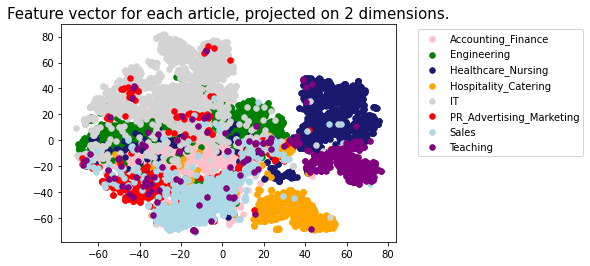

In [85]:
features = titles_descriptions_FastText_unweighted.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(df['Category'],features)

From the plot, we can see that there are a bit of noises. The Engineering and IT, PR_ADvertising_marketing are mixed up. Other categories are separated well.<br>
This plot is very similar to the plot generated from unweighted document of fasttext model based on Description.<br>
Therefore, We mightnot see the boost in the performance when training the logistics regression model later.

### b. Generate bag of words tfidf vector

we need to generate the bag of words tfidf_vector for titles frist

In [86]:

# initialised the TfidfVectorizer using vocab from the job description
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = titles_descriptions_vocab)

# generate the tfidf vector representation for all articles
tfidf_vector = tVectorizer.fit_transform(df['Titles_Descriptions'].tolist()) 

# check the size
tfidf_vector.shape

(55448, 42336)

plot the tfidf_vector ito 2 dimensions

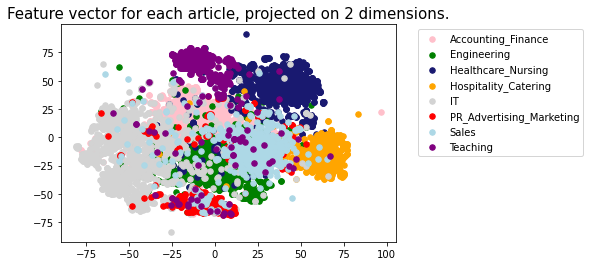

In [87]:
features = tfidf_vector 
plotTSNE(df['Category'],features)

Mapping the tfidf_vector with words by using funtion mapping_words_weights built in task 2

### c. Generate fasttext IF_IDF document vector

In [88]:
# mapping words:weights
tfidf_features = mapping_words_weights(tfidf_vector, titles_descriptions_vocab)

In [89]:
# generating TFIDF vectors
titles_descriptions_FastText_TFIDF= gen_TFIDF_docVecs(titles_descriptions_FastText_wv,df['Tk_titles_descriptions'].tolist(),tfidf_features)
# check whether there is any null values in the document vectors dataframe.
titles_descriptions_FastText_TFIDF.isna().any().sum()

0

In [90]:
print(titles_descriptions_FastText_TFIDF.shape)
titles_descriptions_FastText_TFIDF.sample(3)

(55448, 200)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
50338,0.400366,-1.800334,-2.635888,-0.679663,-2.443908,-0.136004,0.573797,0.856135,0.386644,0.655899,...,-0.505753,0.929798,-1.787306,1.508421,-0.962132,-0.524621,0.570769,-1.047252,-0.600250,-1.941894
7258,-1.382524,-1.966428,-1.308032,2.597748,-6.218365,4.637874,4.314569,7.690035,-3.521520,1.814663,...,3.471886,-4.044456,-4.438918,-1.065892,-1.930232,3.034028,7.020499,0.694353,-1.627362,-2.932111
37210,5.733577,1.304297,3.371044,-3.565196,-3.839042,1.424014,4.233675,0.505414,-2.482833,-0.740415,...,4.683953,-12.627391,-3.505120,-0.526395,0.096496,4.013438,4.710965,-1.202439,-0.385164,-7.479325


#### projecting unweighted document embeddings in 2 dimensional space

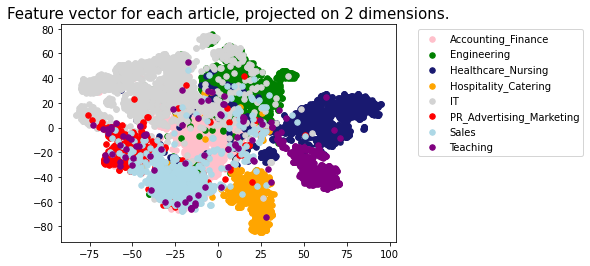

In [91]:
features = titles_descriptions_FastText_TFIDF.to_numpy() # convert the document vector dataframe to a numpy array
plotTSNE(df['Category'],features)

### 2.3 Classification titles+descriptions

In [92]:
# train the model
X_train, X_test, y_train, y_test = train_test_split(titles_descriptions_FastText_unweighted,df['Category'], test_size=0.33, random_state=0 )
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
print('The result is just slightly higher from the ones we had in desciption only')
model.score(X_test, y_test)


The result is just slightly higher from the ones we had in desciption only


C:\Users\ngbao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8717892665865122

cross validation

In [93]:
# create an dataframe to save the accuracy score for each time the model gets trained.
# the vector features  will be trained 5 times
# therefore datafram will has 5 rows and 3 columns

features_df2 = pd.DataFrame(columns = ['Fastext_unweight', 'FastText_tfidf','bag_of_words_tfidf'],
                            index=range(5))

In [94]:
# intialize the index of dataframe by each fold
fold = 0

# capture the train_index, test_index for each time data got split 
for train_index, test_index in kf.split(list(range(len(df)))):


    # capture the labels for train and test data
    
    y_train = df.loc[train_index, 'Category'].tolist()
    y_test = df.loc[test_index, 'Category'].tolist()
      
    features_df2.loc[fold,'Fastext_unweight'] = evaluate(titles_descriptions_FastText_unweighted.loc[train_index,],
                                                        titles_descriptions_FastText_unweighted.loc[test_index,],
                                                        y_train,y_test)
    
    features_df2.loc[fold,'FastText_tfidf'] = evaluate(titles_descriptions_FastText_TFIDF.loc[train_index,],
                                                        titles_descriptions_FastText_TFIDF.loc[test_index,],
                                                        y_train,y_test)
        
    features_df2.loc[fold,'bag_of_words_tfidf'] = evaluate( tfidf_vector[train_index,],
                                                           tfidf_vector[test_index,],
                                                           y_train,y_test)

       
    # move to the next row in the data frame
    fold +=1

C:\Users\ngbao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ngbao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [95]:
features_df2

,Fastext_unweight,FastText_tfidf,bag_of_words_tfidf
0,0.870784,0.876465,0.892606
1,0.874211,0.879982,0.897205
2,0.872768,0.875293,0.89468
3,0.875011,0.878709,0.900352
4,0.875462,0.883308,0.89936


In [96]:
print('This result is slightly higher from the description only experiment and It is clearly higher than the title only experiment ')
titles_descriptions_result2 = features_df2.mean()
titles_descriptions_result2


This result is slightly higher from the description only experiment and It is clearly higher than the title only experiment 


Fastext_unweight      0.873647
FastText_tfidf        0.878751
bag_of_words_tfidf    0.896840
dtype: float64

## 3.2.3  Comparing the classification results to see if the more information the better the classification performance (answer Q2)

In [97]:
# create an empty DataFrame
comparition= pd.DataFrame()

# adding result performance for the titles by seleted vectors
comparition['Titles'] = titles_result

# adding result performance for the Descriptions by seleted vectors
comparition['Descriptions'] = descriptions_result[[0,1, -1]].tolist()

#adding result performance for the Title_Descriptions by seleted vectors
comparition['Title_Descriptions']  = titles_descriptions_result2.tolist()

In [98]:
comparition 

,Titles,Descriptions,Title_Descriptions
FastText_unweight,0.794077,0.867770,0.873647
FastText_tfidf,0.789100,0.873181,0.878751
bag_of_words_tfidf,0.842988,0.893488,0.896840


We used kfold cross validation for 3 models (FastText_unweight, FastText_tfidf, bag_of_words_tfidf) to calculate the performance<br>
From the comparation results, we can see the accuracy score is slightly increasing when the model get trained by more words.<br> We can see the clear jump of performance from titles to description but there is a very small jump of performance from description to titles_descriptions<br>
Eventhought, the boost up in the performance detected from these experiment indicated a small increasing in the performance<br> we still can conclude that adding extra informations help to boost up the accuracy of the model(LogisticRegression).<br>
However, these changes are not always neccessary large.